Practising fundamental TimeSeries functions, with reference to: 
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

## Time Series Data Structures

In [1]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [2]:
pd.to_datetime('7/8/1952')            #assumed to be month, day, year

Timestamp('1952-07-08 00:00:00')

In [4]:
pd.to_datetime('7/8/1952', dayfirst=True)    #dayfirst to tell pandas it is day, month, year

Timestamp('1952-08-07 00:00:00')

In [5]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])      #supply a list of strings, will return DatetimeIndex object

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

Underlying data stored as 64 bit integers, in terms of nanoseconds. This data structure allows pandas to compactly store large sequences of date/time values and efficiently perform vectorized operations using NumPy datetime64 arrays

In [9]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

If have sequence of strings, all same date/time format, can explicitly specify it using "format". For large datasets helps to speed up performance of to_datetime(), otherwise need to infer format separately for each string.

## Creating a time series DataFrame

In [39]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [40]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [41]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [42]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [43]:
opsd_daily.Date = pd.to_datetime(opsd_daily.Date, format = '%Y-%m-%d')

In [44]:
opsd_daily.set_index("Date", inplace=True)

In [45]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Alternatively, can use index_col and parse_dates of read_csv() function.

In [47]:
opsd_daily2 = pd.read_csv('opsd_germany_daily.csv',index_col = 0, parse_dates = True)
opsd_daily2.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [48]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## Time-based indexing

In [49]:
opsd_daily.loc['2017-08-10']         #selecting data for a single day

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [50]:
opsd_daily.loc['2014-01-20':'2014-01-22']         #selecting a slice of days

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [52]:
opsd_daily.loc['2012-02'].head(3)               #partial string indexing

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday


## Visualizing time series data

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns                              #use seaborn style defaults
sns.set(rc={'figure.figsize':(11, 4)})             #set default figsize for seaborn

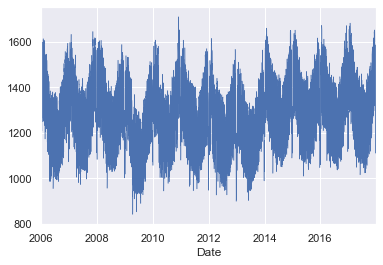

In [54]:
opsd_daily['Consumption'].plot(linewidth=0.5);      #line plot of full time series of Germany's daily electricity consumption

Data visualized every 2 years is helpful. But too many data points, line plot is crowded. Let's plot the data as dots instead, and also look at Solar and Wind time series.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D571583C8>,
      dtype=object)

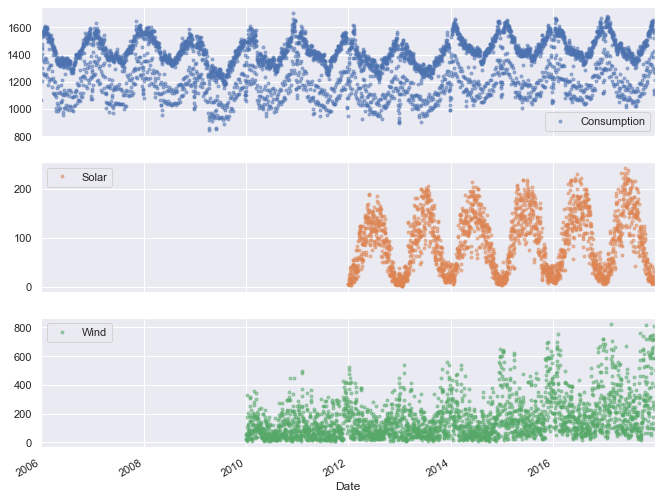

In [75]:
cols_plot = ['Consumption', 'Solar', 'Wind']
opsd_daily[cols_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None',figsize=(11, 9),subplots = True)

From this, we can observe seasonality (a pattern that repeats again and again in regular time intervals). Consumption, Solar and Wind time series oscillate between high and low values on a yearly time scale, corresponding to seasonal changes in weather over the year.

Seasonality can also occur on other time scales. Perhaps, there may be some weekly seasonality in Germany's electricity consumption

## Frequencies

In [76]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex has daily frequency. Available frequencies in pandas are hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. Can also be specified as multiples of any of the base frequencies ('5D'), for every 5 days.


In [77]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [78]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Our time series has no frequency (freq=None). THis is because the index was created from a sequence of dates in our CSV file, without explicitly specifying any frequency for the time series.

If we know that our data should be a specific frequency, we can use the DataFrame's asfreq() method to assign a frequency.
If any date/times are missing in the data, new rows will be added for those date/times (either empty or some specified data filling method such as forward filling or interpolation)

In [81]:
#Let's see how asfreq works

times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [86]:
#convert data to daily frequency without filling any missings
consum_freq = consum_sample.asfreq('D')
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [87]:
# Create a column with missings forward filled, last value repeats through missing rows 
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling

Downsampling: resampling to a lower frequency, usually involves aggregating eg. computing monthly sales totals from daily data

Upsampling: resampling to a higher frequency, often involves data filling method such as interpolating

The daily OPSD data we're working with was downsampled from the original hourly times series. Let's see how downsampling can help us analyze OPSD data on various time scales.

We use resample() method which splits DatetimeIndex into time bins and groups the data by time bin. Then can apply aggregation method such as mean(), median() or sum() to data group for each time bin
- In this sense, similar to Excel Pivot Table, grouping time into bins and then applying aggregation method

In [89]:
#Select the data columns we want to include
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

#Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()        
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


First row "2006-01-01" contains mean of all data contained from 2006-01-01 to 2006-01-07 time bin
Second row "2006-01-08" contains mean of all data contained from 2006-01-08 to 2006-01-14 time bin

By construction, our weekly time series has 1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two dataframes

In [91]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Let's plot the daily and weekly Solar time series together over a single six-month period to compare them

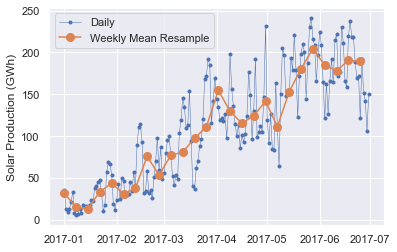

In [93]:
#start and end of data range to extract
start, end = '2017-01','2017-06'

#plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();


Weekly mean time series is smoother than the daily time series, because the higher frequency variability has been averaged out in the resampling.
- resampling can help to reduce variability in the data

Let's resample the data to monthly frequency, aggregating with sum totals instead of the mean. 
- mean() sets output to NaN for any period with any period with all missing data
- sum() sets output to 0 as the sum of missing data. Use min_count to set output to NaN if data is missing

In [94]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data

opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


Monthly, quarterly and annual frequencies are labelled with the end of each month, 31st Jan (right bin edge)
Other frequencies are labelled with beginning, 1 Jan (left bin edge)